In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 前言：
#### 在網路上找可以用來做數據分析的資料，剛好找到在政府資料公開平台提供的農產品交易行情資料。因此想要藉由分析該筆資料數據，聊解農產品價格與交易量之間的關聯性。

## 農產品交易行情

### step 1.Data Collect/資料蒐集—輸入資料
#### 資料來源:政府資料公開平台
#### 網址:https://data.gov.tw/dataset/8066

In [3]:
df_1=pd.read_csv("http://data.coa.gov.tw/Service/OpenData/FromM/FarmTransData.aspx?FOTT=CSV")  #載入資料
df_1

,交易日期,作物代號,作物名稱,市場代號,市場名稱,上價,中價,下價,平均價,交易量
0,108.12.15,11,椰子,104,台北二,13.4,10.9,7.8,10.7,1304.0
1,108.12.15,12,椰子-剝殼,104,台北二,10.0,10.0,10.0,10.0,150.0
2,108.12.15,22,棗子,104,台北二,115.3,66.2,32.5,69.3,4810.0
3,108.12.15,31,釋迦,104,台北二,133.6,98.3,55.5,96.8,991.0
4,108.12.15,32,釋迦-鳳梨釋迦,104,台北二,107.0,79.0,53.8,79.6,661.0
...,...,...,...,...,...,...,...,...,...,...
2996,108.12.09,FE202,非洲菊-沙丘,700,台南市場,25.0,25.0,25.0,25.0,30.0
2997,108.12.09,FE300,非洲菊-黃,700,台南市場,46.0,39.0,19.0,36.0,190.0
2998,108.12.09,FE401,非洲菊-伊斯瑪拉,700,台南市場,49.0,40.0,32.0,40.0,230.0
2999,108.12.09,FE409,非洲菊-粉紅魅力,700,台南市場,60.0,60.0,60.0,60.0,20.0


### step 2.Data Preprocessing/資料前處理—調整一下數據

In [4]:
df_1.shape     # (3001, 10) 共有 3001 種作物，10個欄位

(3001, 10)

In [5]:
df_1.index

RangeIndex(start=0, stop=3001, step=1)

In [6]:
df_1.values

array([['108.12.15', '11', '椰子', ..., 7.8, 10.7, 1304.0],
       ['108.12.15', '12', '椰子-剝殼', ..., 10.0, 10.0, 150.0],
       ['108.12.15', '22', '棗子', ..., 32.5, 69.3, 4810.0],
       ...,
       ['108.12.09', 'FE401', '非洲菊-伊斯瑪拉', ..., 32.0, 40.0, 230.0],
       ['108.12.09', 'FE409', '非洲菊-粉紅魅力', ..., 60.0, 60.0, 20.0],
       ['108.12.09', 'FE701', '非洲菊-紫王子', ..., 29.0, 29.0, 20.0]],
      dtype=object)

In [7]:
df_1.columns

Index(['交易日期', '作物代號', '作物名稱', '市場代號', '市場名稱', '上價', '中價', '下價', '平均價', '交易量'], dtype='object')

In [8]:
df_1.info()           #確認資料中的交易價格都是浮點數狀態，無須再做轉換

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 10 columns):
交易日期    3001 non-null object
作物代號    3001 non-null object
作物名稱    3001 non-null object
市場代號    3001 non-null int64
市場名稱    3001 non-null object
上價      3001 non-null float64
中價      3001 non-null float64
下價      3001 non-null float64
平均價     3001 non-null float64
交易量     3001 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 234.6+ KB


In [9]:
df_1.drop("交易日期", axis=1 , inplace=True)        #因為交易日期看似無太多分析價值，決定剔除

In [11]:
df_1

,作物代號,作物名稱,市場代號,市場名稱,上價,中價,下價,平均價,交易量
0,11,椰子,104,台北二,13.4,10.9,7.8,10.7,1304.0
1,12,椰子-剝殼,104,台北二,10.0,10.0,10.0,10.0,150.0
2,22,棗子,104,台北二,115.3,66.2,32.5,69.3,4810.0
3,31,釋迦,104,台北二,133.6,98.3,55.5,96.8,991.0
4,32,釋迦-鳳梨釋迦,104,台北二,107.0,79.0,53.8,79.6,661.0
...,...,...,...,...,...,...,...,...,...
2996,FE202,非洲菊-沙丘,700,台南市場,25.0,25.0,25.0,25.0,30.0
2997,FE300,非洲菊-黃,700,台南市場,46.0,39.0,19.0,36.0,190.0
2998,FE401,非洲菊-伊斯瑪拉,700,台南市場,49.0,40.0,32.0,40.0,230.0
2999,FE409,非洲菊-粉紅魅力,700,台南市場,60.0,60.0,60.0,60.0,20.0


In [12]:
df_1[df_1.作物名稱=="休市"].index    #看看是否有休市(無作物交易)的狀態，發現有10個休市的市集，把這些市集剔除

Int64Index([290, 1110, 1427, 1574, 1575, 1600, 1626, 1627, 1796, 2149], dtype='int64')

In [13]:
df_1.drop(df_1[df_1.作物名稱=="休市"].index)    #剔除休市後的新資料長相

,作物代號,作物名稱,市場代號,市場名稱,上價,中價,下價,平均價,交易量
0,11,椰子,104,台北二,13.4,10.9,7.8,10.7,1304.0
1,12,椰子-剝殼,104,台北二,10.0,10.0,10.0,10.0,150.0
2,22,棗子,104,台北二,115.3,66.2,32.5,69.3,4810.0
3,31,釋迦,104,台北二,133.6,98.3,55.5,96.8,991.0
4,32,釋迦-鳳梨釋迦,104,台北二,107.0,79.0,53.8,79.6,661.0
...,...,...,...,...,...,...,...,...,...
2996,FE202,非洲菊-沙丘,700,台南市場,25.0,25.0,25.0,25.0,30.0
2997,FE300,非洲菊-黃,700,台南市場,46.0,39.0,19.0,36.0,190.0
2998,FE401,非洲菊-伊斯瑪拉,700,台南市場,49.0,40.0,32.0,40.0,230.0
2999,FE409,非洲菊-粉紅魅力,700,台南市場,60.0,60.0,60.0,60.0,20.0


In [15]:
df_2=df_1.drop(df_1[df_1.作物名稱=="休市"].index)

In [16]:
df_2

,作物代號,作物名稱,市場代號,市場名稱,上價,中價,下價,平均價,交易量
0,11,椰子,104,台北二,13.4,10.9,7.8,10.7,1304.0
1,12,椰子-剝殼,104,台北二,10.0,10.0,10.0,10.0,150.0
2,22,棗子,104,台北二,115.3,66.2,32.5,69.3,4810.0
3,31,釋迦,104,台北二,133.6,98.3,55.5,96.8,991.0
4,32,釋迦-鳳梨釋迦,104,台北二,107.0,79.0,53.8,79.6,661.0
...,...,...,...,...,...,...,...,...,...
2996,FE202,非洲菊-沙丘,700,台南市場,25.0,25.0,25.0,25.0,30.0
2997,FE300,非洲菊-黃,700,台南市場,46.0,39.0,19.0,36.0,190.0
2998,FE401,非洲菊-伊斯瑪拉,700,台南市場,49.0,40.0,32.0,40.0,230.0
2999,FE409,非洲菊-粉紅魅力,700,台南市場,60.0,60.0,60.0,60.0,20.0


In [20]:
df_2[df_2.平均價==0].index              #看看是否有作物根本沒有交易的情形(價格為0)，發現有14個根本無交易價格，把這些剔除

Int64Index([2176, 2230, 2236, 2263, 2285, 2287, 2306, 2317, 2431, 2445, 2447,
            2453, 2475, 2845],
           dtype='int64')

In [21]:
df_2.drop(df_2[df_2.平均價==0].index)   #剔除後的新資料長相

,作物代號,作物名稱,市場代號,市場名稱,上價,中價,下價,平均價,交易量
0,11,椰子,104,台北二,13.4,10.9,7.8,10.7,1304.0
1,12,椰子-剝殼,104,台北二,10.0,10.0,10.0,10.0,150.0
2,22,棗子,104,台北二,115.3,66.2,32.5,69.3,4810.0
3,31,釋迦,104,台北二,133.6,98.3,55.5,96.8,991.0
4,32,釋迦-鳳梨釋迦,104,台北二,107.0,79.0,53.8,79.6,661.0
...,...,...,...,...,...,...,...,...,...
2996,FE202,非洲菊-沙丘,700,台南市場,25.0,25.0,25.0,25.0,30.0
2997,FE300,非洲菊-黃,700,台南市場,46.0,39.0,19.0,36.0,190.0
2998,FE401,非洲菊-伊斯瑪拉,700,台南市場,49.0,40.0,32.0,40.0,230.0
2999,FE409,非洲菊-粉紅魅力,700,台南市場,60.0,60.0,60.0,60.0,20.0


In [22]:
df_3=df_2.drop(df_2[df_2.平均價==0].index)

In [23]:
df_3

,作物代號,作物名稱,市場代號,市場名稱,上價,中價,下價,平均價,交易量
0,11,椰子,104,台北二,13.4,10.9,7.8,10.7,1304.0
1,12,椰子-剝殼,104,台北二,10.0,10.0,10.0,10.0,150.0
2,22,棗子,104,台北二,115.3,66.2,32.5,69.3,4810.0
3,31,釋迦,104,台北二,133.6,98.3,55.5,96.8,991.0
4,32,釋迦-鳳梨釋迦,104,台北二,107.0,79.0,53.8,79.6,661.0
...,...,...,...,...,...,...,...,...,...
2996,FE202,非洲菊-沙丘,700,台南市場,25.0,25.0,25.0,25.0,30.0
2997,FE300,非洲菊-黃,700,台南市場,46.0,39.0,19.0,36.0,190.0
2998,FE401,非洲菊-伊斯瑪拉,700,台南市場,49.0,40.0,32.0,40.0,230.0
2999,FE409,非洲菊-粉紅魅力,700,台南市場,60.0,60.0,60.0,60.0,20.0


In [27]:
headers=['crop_number','crop','market_number','market','price_upper','price_middle','price_lower','price_mean','volume']
df_3.columns = headers    #把columns名稱調整成英文，方便分析操作

In [28]:
df_3.columns             #調整過後columns

Index(['crop_number', 'crop', 'market_number', 'market', 'price_upper',
       'price_middle', 'price_lower', 'price_mean', 'volume'],
      dtype='object')

### step 3.Explore Data Analytics/探索性資料分析—透過敘述統計、圖表分析等了解資料

In [29]:
df_3.describe()
#基本的敘述統計：
#3001種交易作物的總體平均價在58.52塊，平均交易量1980.24。

,market_number,price_upper,price_middle,price_lower,price_mean,volume
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000
mean,370.127309,71.183272,58.261673,47.139940,58.528767,1980.247061
std,267.993331,81.427310,71.751044,66.030848,71.685870,7393.104794
min,104.000000,0.600000,0.600000,0.600000,0.600000,0.600000
25%,109.000000,27.000000,21.300000,15.000000,21.400000,65.000000
50%,338.000000,49.000000,38.000000,28.200000,38.300000,292.000000
75%,514.000000,89.500000,71.900000,57.500000,72.900000,1270.000000
max,930.000000,1500.000000,1500.000000,1500.000000,1500.000000,221311.000000


In [32]:
 df_3.sort_values(['price_mean'], ascending=False)          
#看看平均價得排名
#發現最貴前五個農產品都是進口的水果，其中最貴的是進口草莓，但是交易量似乎不太高。
#反觀末五名，都是蔬菜類，成交量雖仍低於平均，但高於前五價格高者。
#看來平均價比較高，交易量不一定比較高。

,crop_number,crop,market_number,market,price_upper,price_middle,price_lower,price_mean,volume
871,459,草莓-進口,241,三重區,1500.0,1500.0,1500.0,1500.0,12.6
863,Z39,柿餅-柿餅進口,220,板橋區,1200.0,1000.0,800.0,1000.0,10.0
665,F9,雜柑-進口,220,板橋區,833.3,833.3,833.3,833.3,0.6
1108,Z39,柿餅-柿餅進口,241,三重區,750.0,750.0,750.0,750.0,8.0
1632,459,草莓-進口,800,高雄市,800.0,747.3,650.0,738.4,25.0
...,...,...,...,...,...,...,...,...,...
454,LH3,菠菜-甜菠菜,109,台北一,3.0,3.0,3.0,3.0,104.0
2050,SB1,胡蘿蔔-未洗,900,屏東市,5.0,2.6,2.0,2.6,440.0
1360,LA9,甘藍-進口,400,台中市,2.0,2.0,2.0,2.0,990.0
2003,LA9,甘藍-進口,900,屏東市,1.1,1.1,1.1,1.1,828.0


#### 看看幾個農產品的情形

In [33]:
df_3[df_3.crop=="草莓-進口"]                #看一下草莓-進口的數據，發現價格都高於總體平均價格，但交易量不多。顯示草莓是偏貴的農產品。

,crop_number,crop,market_number,market,price_upper,price_middle,price_lower,price_mean,volume
6,459,草莓-進口,104,台北二,467.5,400.0,400.0,413.5,79.0
297,459,草莓-進口,109,台北一,600.0,451.5,266.7,444.2,107.0
871,459,草莓-進口,241,三重區,1500.0,1500.0,1500.0,1500.0,12.6
1262,459,草莓-進口,400,台中市,250.0,250.0,250.0,250.0,28.0
1481,459,草莓-進口,420,豐原區,125.0,125.0,125.0,125.0,2.0
1632,459,草莓-進口,800,高雄市,800.0,747.3,650.0,738.4,25.0


In [73]:
df_3[df_3.crop=="胡蘿蔔-未洗"]             #看一下胡蘿蔔-未洗的數據，發現價格都低於總體平均價格，但交易量都頗多。

,crop_number,crop,market_number,market,price_upper,price_middle,price_lower,price_mean,volume
226,SB1,胡蘿蔔-未洗,104,台北二,10.4,5.5,3.2,6.0,2810.0
550,SB1,胡蘿蔔-未洗,109,台北一,13.9,9.1,3.7,9.0,6952.0
810,SB1,胡蘿蔔-未洗,220,板橋區,14.8,9.4,5.1,9.6,5211.0
1054,SB1,胡蘿蔔-未洗,241,三重區,16.8,8.6,2.6,9.0,3636.0
1223,SB1,胡蘿蔔-未洗,338,桃農,10.9,8.1,2.1,7.5,1227.0
1435,SB1,胡蘿蔔-未洗,400,台中市,11.2,7.4,3.5,6.0,1364.0
1602,SB1,胡蘿蔔-未洗,514,溪湖鎮,18.5,14.1,8.8,13.9,9499.0
1802,SB1,胡蘿蔔-未洗,800,高雄市,14.8,11.7,5.7,11.1,580.0
2050,SB1,胡蘿蔔-未洗,900,屏東市,5.0,2.6,2.0,2.6,440.0
2865,SB1,胡蘿蔔-未洗,514,溪湖鎮,22.5,15.6,9.2,15.7,2138.0


#### 探討平均價和交易量的相關性：

In [39]:
df_4 = df_3[['price_mean', 'volume']]   #先把 dataFrame 取子集合（僅含平均價和交易量）
df_4

,price_mean,volume
0,10.7,1304.0
1,10.0,150.0
2,69.3,4810.0
3,96.8,991.0
4,79.6,661.0
...,...,...
2996,25.0,30.0
2997,36.0,190.0
2998,40.0,230.0
2999,60.0,20.0


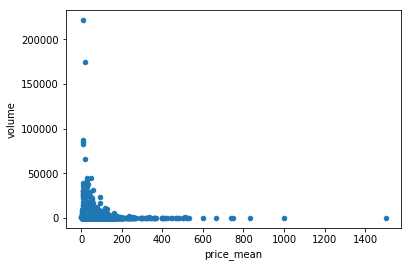

In [40]:
df_4.plot(kind='scatter', x='price_mean', y='volume')
#將 price_mean當作 x 軸，cvolume 當 y 軸畫出 scatter
#有outlier存在

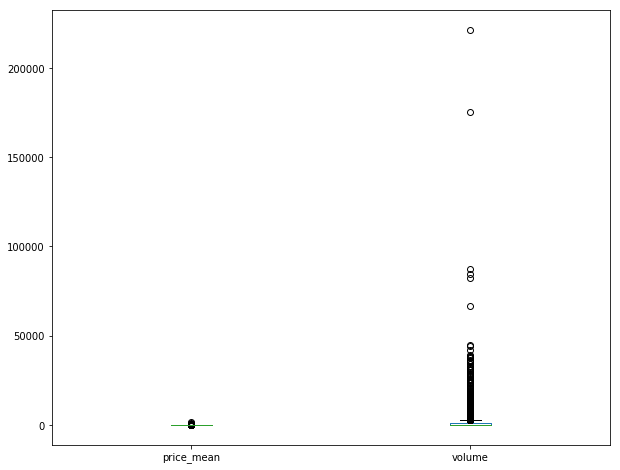

In [79]:
df_4.plot.box(figsize=(10,8))         

In [59]:
df_4.corr(method ='pearson')                              

,price_mean,volume
price_mean,1.000000,-0.099872
volume,-0.099872,1.000000


In [60]:
df_4.sort_values(['price_mean'], ascending=False)          #前後五名的數據不太好，決定剔除

,price_mean,volume
871,1500.0,12.6
863,1000.0,10.0
665,833.3,0.6
1108,750.0,8.0
1632,738.4,25.0
...,...,...
454,3.0,104.0
2050,2.6,440.0
1360,2.0,990.0
2003,1.1,828.0


In [61]:
df_5 = df_4.sort_values(['price_mean'], ascending=False)          

In [62]:
df_6=df_5[5:2972]                       #剔除前後共十筆資料

In [63]:
df_6

,price_mean,volume
629,666.7,55.0
1857,600.0,8.0
332,533.3,56.0
1642,523.9,461.0
646,520.0,37.5
...,...,...
118,4.0,50.0
1356,4.0,138.0
996,4.0,255.0
1946,3.7,180.0


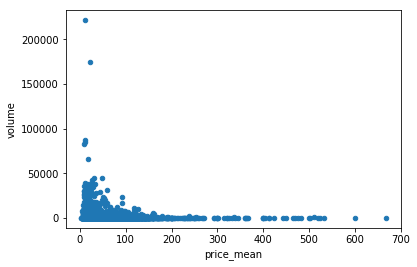

In [68]:
df_6.plot(kind='scatter', x='price_mean', y='volume')         
#剔除部分極端後，顯示在volumn值有幾筆極端。
#在price_mean的分布上整體價格差異頗大。
#整體散部圖的點多分布在圖形左下方，隱約呈現負相關。

In [65]:
df_6.corr(method ='pearson')           
#從皮爾森相關係數發現變數 (price_mean, volume) 之間的線性相關為負相關。

,price_mean,volume
price_mean,1.000000,-0.112568
volume,-0.112568,1.000000


##### 小結
##### 應證體物以稀為貴:草莓價格與胡蘿蔔價格對應的成交量可佐證，從總體來看農產品的交易價格與成交量大致為負向關系。